In [1]:
# import standard data science libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from numpy.random import normal, uniform, binomial
from sklearn.linear_model import LinearRegression

In [2]:
# Format plots
font = {'size' : 20}
matplotlib.rc('font', **font)

# Data Generating Processes

This section describes several data generating processes that we will try to model. We typically don't have access to the data generating process directly, but do have access to its output in the form of data. The following programs represent simple data generating processes over two variables, x and y.

In [3]:
def generate_data(dgp, n_samples):
    x = np.zeros(n_samples)
    y = np.zeros(n_samples)

    for i in range(n_samples):
        # Note, this loop can be made more efficient by using array operations.
        x[i], y[i] = dgp()
    
    return x, y

In [4]:
def dgp1(x_mean = 0, 
         x_std  = 1, 
         a      = 3, 
         b      = 1, 
         y_std  = 1):
    
    # Sample x from a standard normal distribution
    x = normal(x_mean, x_std)

    # Sample y from a normal distribution whose mean is a linear function of x with some offset.
    y_mean = a * x + b
    y = normal(y_mean, y_std)
    
    return [x, y]

Text(0.5,1,'DGP1 - Linear Function w/ Standard Normal x')

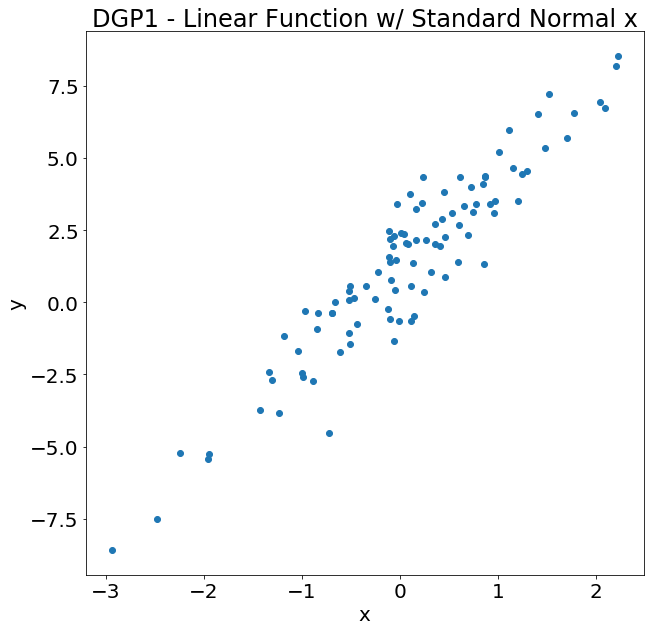

In [5]:
x1, y1 = generate_data(dgp1, 100)

plt.figure(figsize=(10, 10))
plt.scatter(x1, y1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("DGP1 - Linear Function w/ Standard Normal x")

In [6]:
def dgp2(x_min = -2, 
         x_max = 2, 
         a     = 3,
         b     = 1,
         y_std = 1):
    
    # Sample x from a uniform(-2,2) distribution
    x = uniform(x_min, x_max)

    # Sample y from a normal distribution whose mean is a linear function of x with some offset.
    y_mean = a * x + b
    y = normal(y_mean, y_std)
    
    return [x, y]

Text(0.5,1,'DGP2 - Linear Function w/ Uniform x')

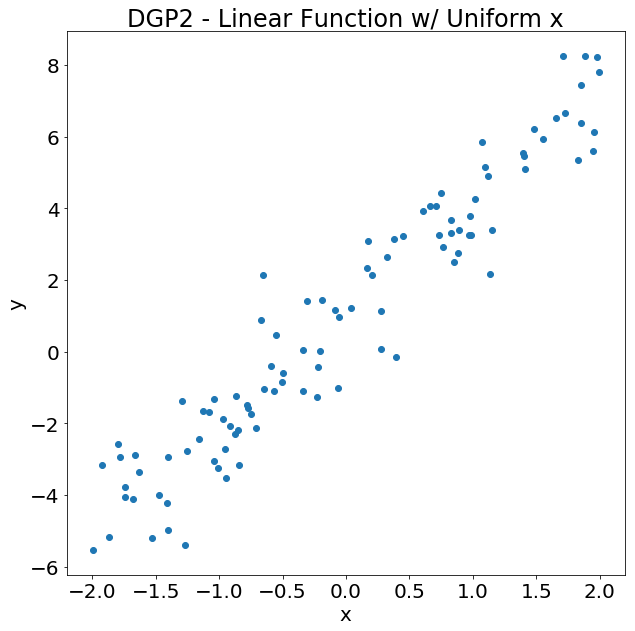

In [7]:
x2, y2 = generate_data(dgp2, 100)

plt.figure(figsize=(10, 10))
plt.scatter(x2, y2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("DGP2 - Linear Function w/ Uniform x")

In [8]:
def dgp3(x_mean = 0, 
         x_std  = 1,
         a      = 1,
         b      = 3,
         c      = 1,
         y_std  = 1):
    
    # Generate x from a standard normal distribution.
    x = normal(x_mean, x_std)

    # Generate y from a normal distribution whose mean is a 2nd degree polynomial function of x.
    y_mean = a * x**2 + b * x + c
    y = normal(y_mean, y_std)
    
    return [x, y]

Text(0.5,1,'DGP3 - Polynomial Function w/ Standard Normal x')

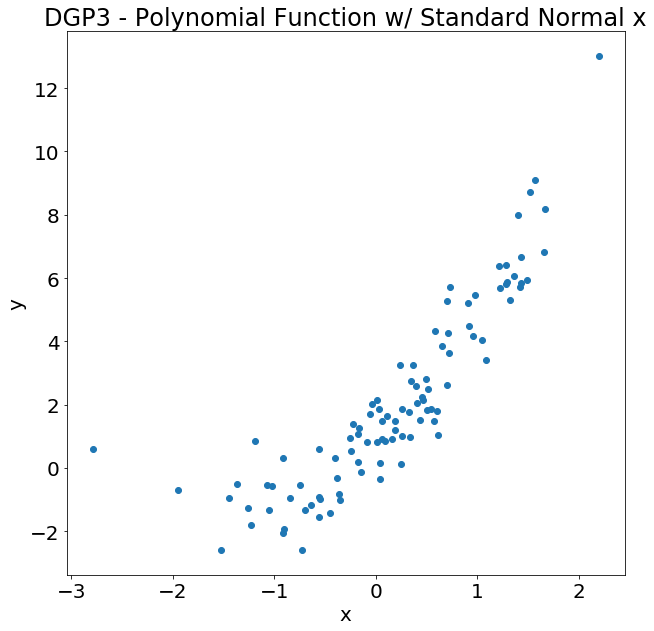

In [9]:
x3, y3 = generate_data(dgp3, 100)

plt.figure(figsize=(10, 10))
plt.scatter(x3, y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("DGP3 - Polynomial Function w/ Standard Normal x")

In [10]:
def dgp4():
    # Sample a mixture id from a bernoulli random variable.
    mixture_id = binomial(p=0.5, n=1)

    # Depending on the mixture id, sample from one of two linear functions.
    if mixture_id:
        return dgp1(b=20)
    else:
        return dgp1(x_mean=4)

Text(0.5,1,'DGP4 - Mixture of Linear Functions w/ Standard Normal x')

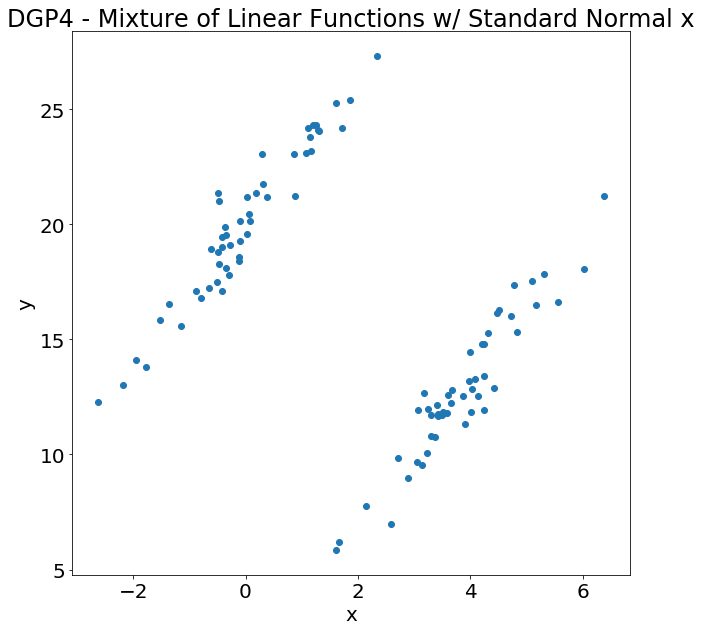

In [11]:
x4, y4 = generate_data(dgp4, 100)

plt.figure(figsize=(10, 10))
plt.scatter(x4, y4)
plt.xlabel("x")
plt.ylabel("y")
plt.title("DGP4 - Mixture of Linear Functions w/ Standard Normal x")

# Probabilistic Modeling

Given our domain expertise, we assume that y is a linear function of x with some offset and noise, but we don't know the slope or the offset. Here we express these assumption as a probabilistic model. Notice how the slope is now sampled randomly within the function, rather than being an input. This encodes our uncertainty about the model.

In [12]:
def linear_model(x_data):
    # x_data is a numpy array of observations of the variable x.
    slope = normal(0, 5)
    intercept = normal(0, 5)
    
    y_hat = slope * x_data + intercept
    
    return y_hat

Text(0.5,1,'DGP1 vs. Random Linear Model')

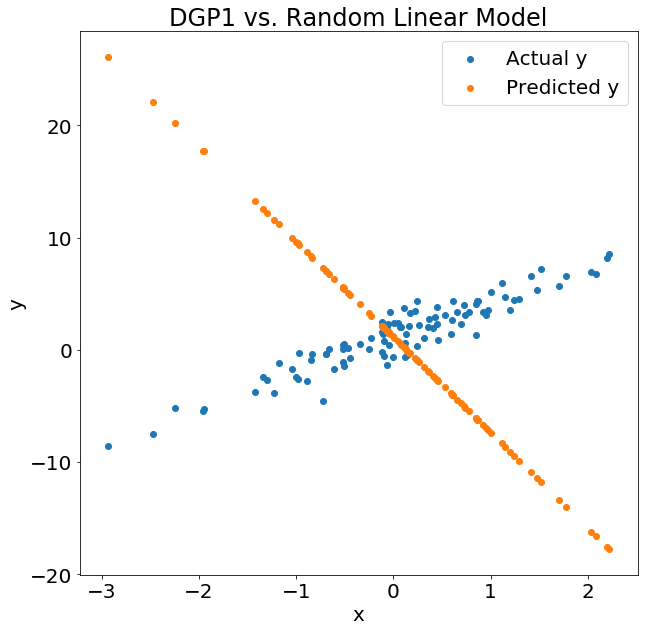

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(x1, y1, label = "Actual y")
plt.scatter(x1, linear_model(x1), label="Predicted y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("DGP1 vs. Random Linear Model")

# Parameter Estimation

Rather than using a random slope and intercept, let's use the data to estimate better values for these unknown parameters. Here we'll use ordinary least squares regression.

In [14]:
# Estimate the parameters of our probabilistic model using ordinary least squares linear regression.
model = LinearRegression()
model.fit(np.expand_dims(x1, axis=1), y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print("Estimated intercept = " + str(model.intercept_))
print("Actual intercept = 1")

Estimated intercept = 1.1577506204768324
Actual intercept = 1


In [16]:
print("Estimated slope = " + str(model.coef_[0]))
print("Actual slope = 3")

Estimated slope = 3.092837111397325
Actual slope = 3


In this example we know the estimation performed well because we know the true data generating procedure. However, if we don't have the data generating process we can compare the model's updated predictions with the actual values from the data.

# Inference

Using the updated parameters, we'll now use the model to predict the y values from each data generating process. Right now we're predicting on the same data that was used to estimate the model parameters. This can be misleading in general, and we'll discuss why later in the course.

In [17]:
def get_predictions(x, y):
    x_formatted = np.expand_dims(x, axis=1)
    
    model = LinearRegression()
    model.fit(x_formatted, y)
    
    y_hat = model.predict(x_formatted)
    
    return y_hat

Text(0.5,1,'DGP1 vs. Learned Linear Model')

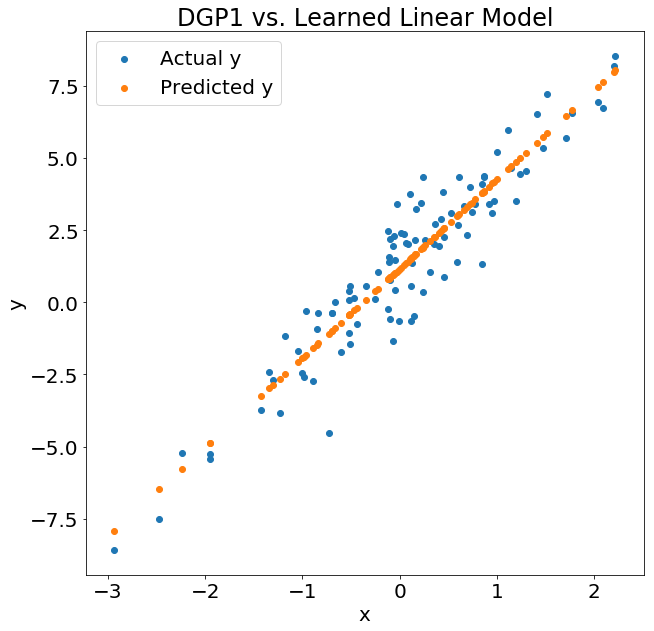

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(x1, y1, label = "Actual y")
plt.scatter(x1, get_predictions(x1, y1), label="Predicted y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("DGP1 vs. Learned Linear Model")

Text(0.5,1,'DGP2 vs. Learned Linear Model')

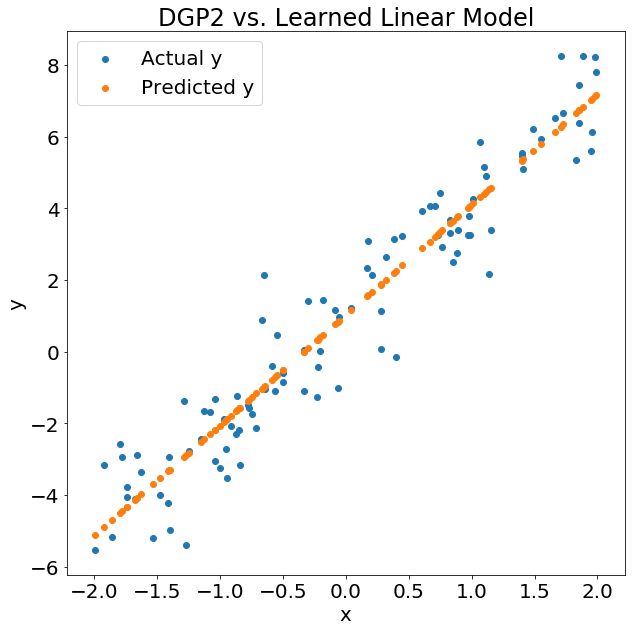

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x2, y2, label = "Actual y")
plt.scatter(x2, get_predictions(x2, y2), label="Predicted y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("DGP2 vs. Learned Linear Model")

Text(0.5,1,'DGP3 vs. Learned Linear Model')

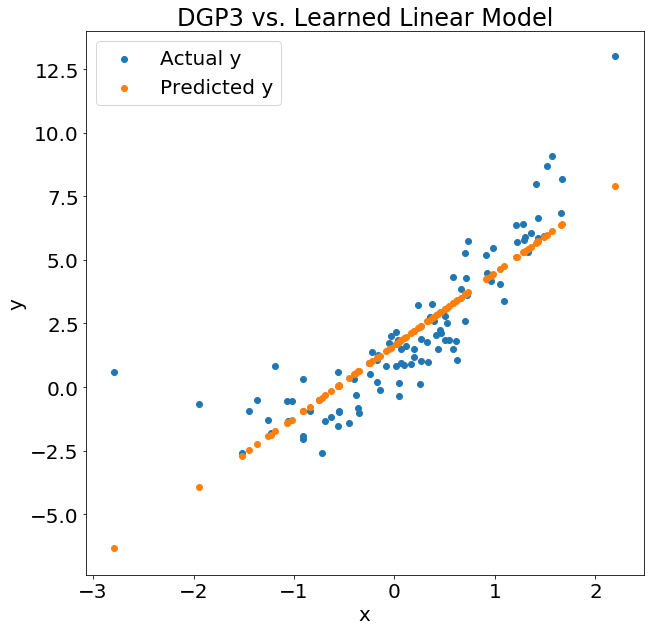

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(x3, y3, label = "Actual y")
plt.scatter(x3, get_predictions(x3, y3), label="Predicted y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("DGP3 vs. Learned Linear Model")

Text(0.5,1,'DGP4 vs. Learned Linear Model')

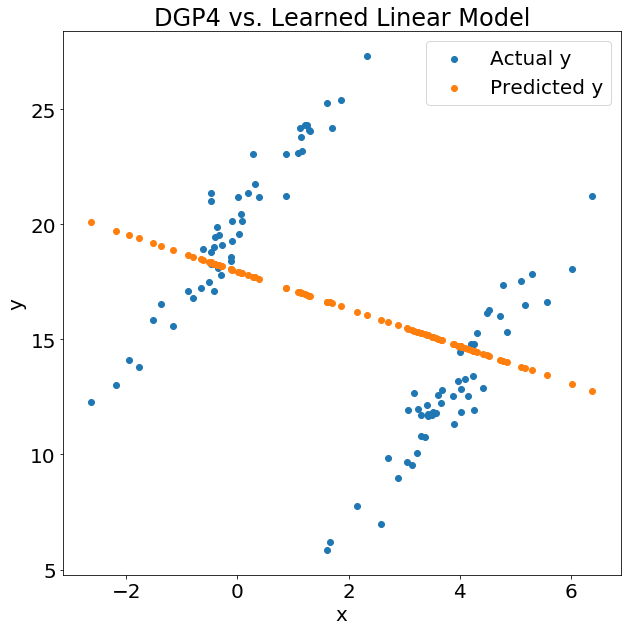

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(x4, y4, label = "Actual y")
plt.scatter(x4, get_predictions(x4, y4), label="Predicted y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("DGP4 vs. Learned Linear Model")